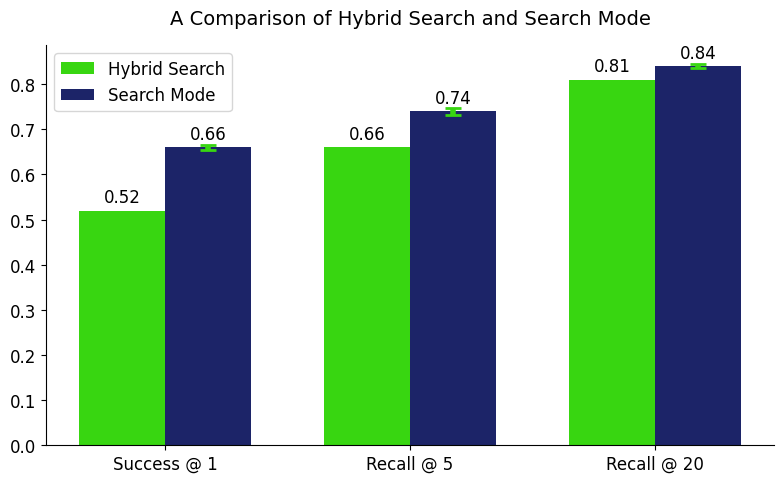

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
categories = ["Success @ 1", "Recall @ 5", "Recall @ 20"]
values1 = [0.52, 0.66, 0.81]
values2 = [0.66, 0.74, 0.84]
search_mode_std = [0.005, 0.008, 0.005]

x = np.arange(len(categories))  # positions for categories
width = 0.35  # width of each bar

plt.rcParams.update({"font.size": 12, "font.family": "DejaVu Sans"})
fig, ax = plt.subplots(figsize=(8, 5))

# Plot side-by-side bars
#bars1 = ax.bar(x - width/2, values1, width, label="Hybrid Search", color="#38d611")
#bars2 = ax.bar(x + width/2, values2, width, yerr=search_mode_std, label="Search Mode", color="#1c2468")

bars1 = ax.bar(x - width/2, values1, width, label="Hybrid Search",
               color="#38d611", zorder=1)
bars2 = ax.bar(x + width/2, values2, width, label="Search Mode",
               color="#1c2468", zorder=1)

centers2 = [b.get_x() + b.get_width()/2 for b in bars2]
ax.errorbar(
    centers2, values2, yerr=search_mode_std,
    fmt='none', ecolor='#38d611', elinewidth=4, capsize=6, capthick=2, zorder=5
)

# Add labels on bars
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,                # add padding
            height,              # percentage formatting
            ha="center", va="bottom"
        )

# Clean up chart style
ax.set_title("A Comparison of Hybrid Search and Search Mode", fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Minimalist grid and spine adjustments
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.yaxis.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("average-results.png")
plt.show()


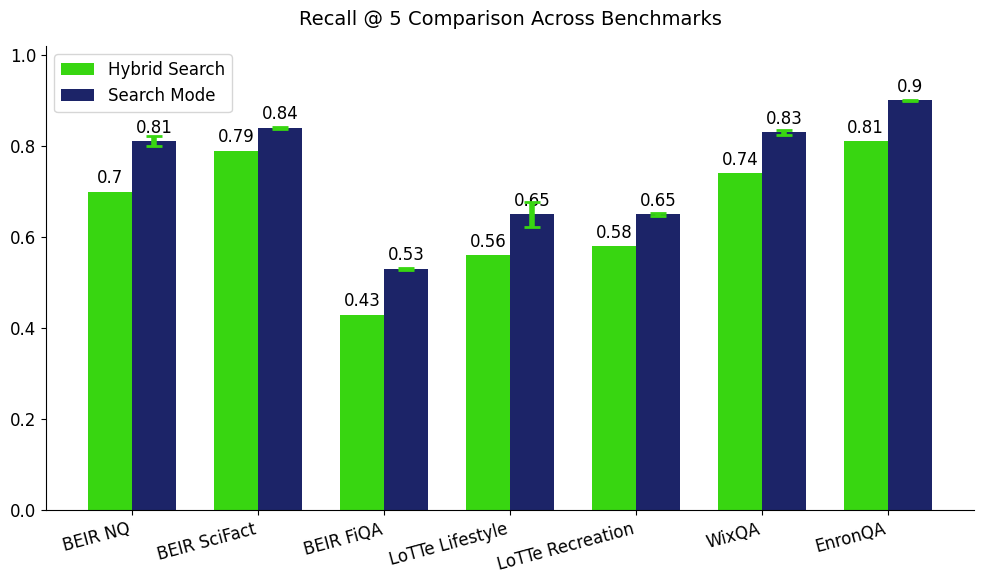

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Data ----
categories = [
    "BEIR NQ", "BEIR SciFact", "BEIR FiQA",
    "LoTTe Lifestyle", "LoTTe Recreation",
    "WixQA", "EnronQA"
]
hybrid =  [0.70, 0.79, 0.43, 0.56, 0.58, 0.74, 0.81]
search =  [0.81, 0.84, 0.53, 0.65, 0.65, 0.83, 0.90]
search_mode_std = [0.011, 0.002, 0.002, 0.028, 0.003, 0.006, 0.001]

x = np.arange(len(categories))
width = 0.35

# ---- Styling defaults ----
plt.rcParams.update({"font.size": 12, "font.family": "DejaVu Sans"})

fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bars1 = ax.bar(x - width/2, hybrid, width, label="Hybrid Search", color="#38d611")
bars2 = ax.bar(x + width/2, search, width, label="Search Mode",  color="#1c2468")

centers2 = [b.get_x() + b.get_width()/2 for b in bars2]
ax.errorbar(
    centers2, search, yerr=search_mode_std,
    fmt='none', ecolor='#38d611', elinewidth=4, capsize=6, capthick=2, zorder=5
)

# Percent labels on bars
def add_bar_labels(bars, pad=0.01):
    for b in bars:
        h = b.get_height()
        ax.text(
            b.get_x() + b.get_width()/2,
            h + pad,
            h,
            ha="center", va="bottom"
        )

add_bar_labels(bars1)
add_bar_labels(bars2)

# Title, axes, legend
ax.set_title("Recall @ 5 Comparison Across Benchmarks", fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15, ha="right")
ax.set_ylim(0, 1.02)  # small headroom for labels
ax.legend()

# Clean look: grid + spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.yaxis.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig("recall-at-5-comparison.png")
plt.show()


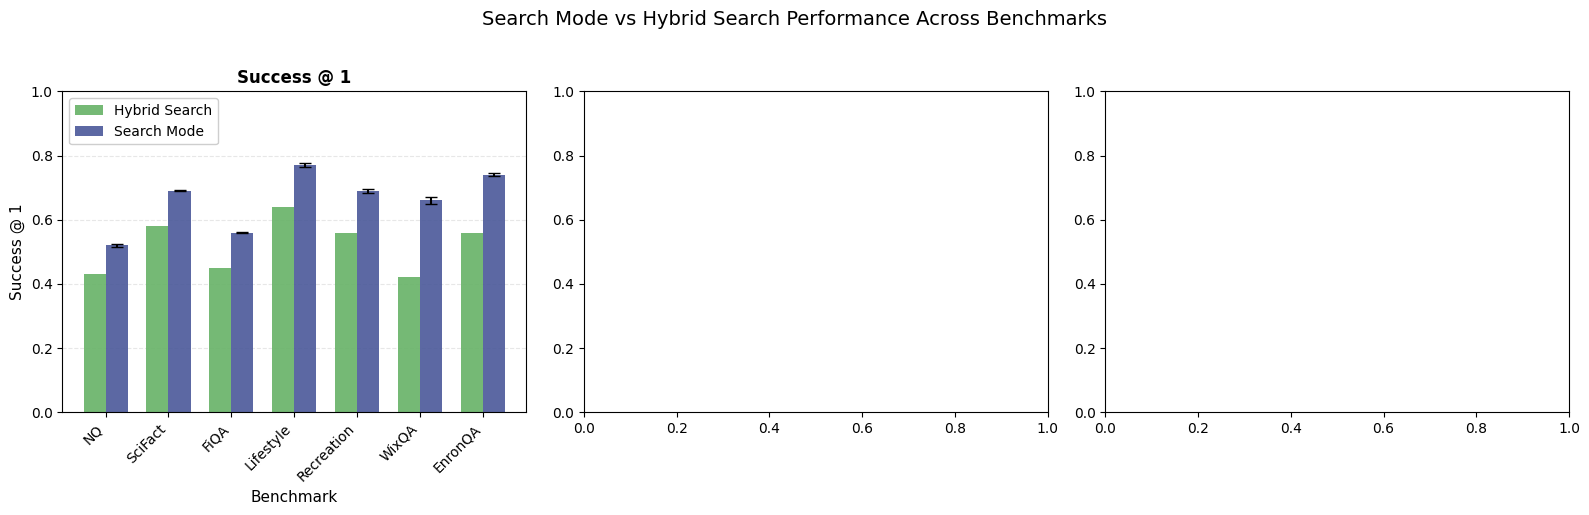

In [8]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Success @ 1']
benchmarks = ['NQ', 'SciFact', 'FiQA', 'Lifestyle', 'Recreation', 'WixQA', 'EnronQA']

# Your data (simplified example)
data = {
    'Success @ 1': {
        'hybrid': [0.43, 0.58, 0.45, 0.64, 0.56, 0.42, 0.56],
        'search': [0.52, 0.69, 0.56, 0.77, 0.69, 0.66, 0.74],
        'search_std': [0.004, 0.002, 0.001, 0.006, 0.007, 0.010, 0.005]
    },
    # ... similar for other metrics
}

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Search Mode vs Hybrid Search Performance Across Benchmarks', 
             fontsize=14, y=1.02)

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    x = np.arange(len(benchmarks))
    width = 0.35
    
    # Plot bars
    ax.bar(x - width/2, data[metric]['hybrid'], width, 
           label='Hybrid Search', color='#66B266', alpha=0.9)
    ax.bar(x + width/2, data[metric]['search'], width,
           label='Search Mode', color='#4A5899', alpha=0.9,
           yerr=data[metric]['search_std'], capsize=4)
    
    # Styling
    ax.set_xlabel('Benchmark', fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(benchmarks, rotation=45, ha='right')
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    if idx == 0:
        ax.legend(loc='upper left', framealpha=0.95)

plt.tight_layout()